In [1]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [5]:
# reading the csv
df_1= pd.read_csv(r"C:\Users\RUDRA\project\capstone7\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [7]:
df_1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [8]:
# reading the 2015 to 2016
df_2= pd.read_csv(r"C:\Users\RUDRA\project\capstone7\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [9]:
# reading the 2017 to onwards
df_3= pd.read_csv(r"C:\Users\RUDRA\project\capstone7\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [10]:
# Preprocessing
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concadinating the df_2 and df_3

df_4= pd.concat([df_2,df_3],axis= 0)
df_4.reset_index(drop= True, inplace= True)
df_4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
219025,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0
219026,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 08 months,1000000.0


In [11]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219027 entries, 0 to 219026
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                219027 non-null  object 
 1   town                 219027 non-null  object 
 2   flat_type            219027 non-null  object 
 3   block                219027 non-null  object 
 4   street_name          219027 non-null  object 
 5   storey_range         219027 non-null  object 
 6   floor_area_sqm       219027 non-null  float64
 7   flat_model           219027 non-null  object 
 8   lease_commence_date  219027 non-null  int64  
 9   remaining_lease      219027 non-null  object 
 10  resale_price         219027 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.4+ MB


In [12]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [13]:
# Creating a new column "address"
df_4["address"]= df_4["block"]+" "+df_4["street_name"]

In [14]:
#droping the "street_name" and "block"
df_5= df_4.drop(columns=["block","street_name"])
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [15]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")
#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [16]:
df_5["town"].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [17]:
df_5["town"].nunique()

26

In [18]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [19]:
df_5["flat_type"].nunique()

7

In [20]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [21]:
df_5["flat_model"].nunique()

21

In [22]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [23]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [24]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [25]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [26]:
df_5

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,0,2.0,01 TO 03,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015
3,1,0,2.0,01 TO 03,68.0,12.0,1979,63,290000.0,446 ANG MO KIO AVE 10,2015
4,1,0,2.0,07 TO 09,68.0,12.0,1980,64,290000.0,557 ANG MO KIO AVE 10,2015
...,...,...,...,...,...,...,...,...,...,...,...
219022,6,25,5.0,04 TO 06,146.0,7.0,1988,63 years 03 months,800000.0,351 YISHUN AVE 11,2024
219023,6,25,5.0,04 TO 06,142.0,3.0,1988,63 years 01 month,850000.0,328 YISHUN RING RD,2024
219024,6,25,5.0,10 TO 12,146.0,7.0,1986,61 years,790000.0,723 YISHUN ST 71,2024
219025,6,25,5.0,10 TO 12,146.0,7.0,1988,62 years 08 months,1000000.0,826 YISHUN ST 81,2024


In [27]:
df_5[["storey_start", "storey_end"]]= df_5["storey_range"].str.split(" TO ",expand=True)

In [28]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [29]:
df_5["address"].nunique()

9591

In [30]:
# Address have 9591 unique values in the 219027 , so we encode it for the correlation checking
# selecting the "LabelEncoder" for the "address" column

df_5["address"]= LabelEncoder().fit_transform(df_5["address"])

In [31]:
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)

In [32]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [33]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [34]:
df_data.head()

,remaining_lease_year,remaining_lease_month
0,70,None
1,65,None
2,64,None
3,63,None
4,64,None


In [35]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [36]:
df_data.head()

,remaining_lease_year,remaining_lease_month
0,70,0
1,65,0
2,64,0
3,63,0
4,64,0


In [37]:
#droping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"],inplace= True)
df_6= pd.concat([df_5,df_data],axis=1)
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [38]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [39]:
df_8=df_7.sort_values(by=["year","month"])

In [40]:
df_8.to_csv("ResaleFlatSingaporePrices.csv", index= False)

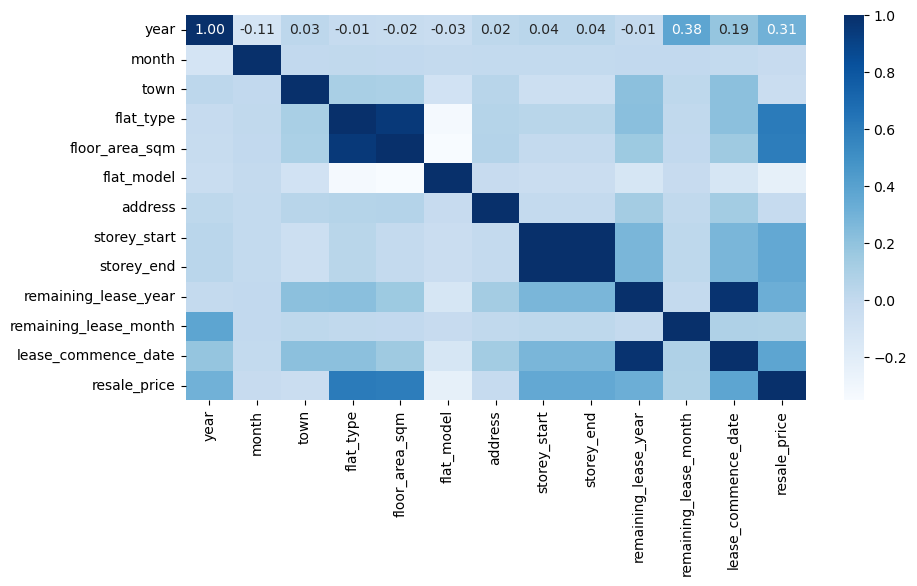

In [43]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Blues", fmt=".2f")
plt.show()

In [44]:
df_8_corr

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
year,1.000000,-0.113308,0.026285,-0.011725,-0.021170,-0.030830,0.019891,0.036179,0.036179,-0.006724,0.380332,0.185577,0.305493
month,-0.113308,1.000000,0.006192,0.007126,0.004906,-0.004387,0.000669,-0.002174,-0.002174,0.001777,0.002383,0.000404,-0.016454
town,0.026285,0.006192,1.000000,0.110411,0.100431,-0.090558,0.049017,-0.052439,-0.052439,0.215719,0.020641,0.216881,-0.037190
flat_type,-0.011725,0.007126,0.110411,1.000000,0.951387,-0.329848,0.059075,0.039358,0.039358,0.220343,0.009440,0.213410,0.611622
floor_area_sqm,-0.021170,0.004906,0.100431,0.951387,1.000000,-0.352379,0.062810,-0.004947,-0.004947,0.157995,0.004460,0.149997,0.599836
flat_model,-0.030830,-0.004387,-0.090558,-0.329848,-0.352379,1.000000,-0.015023,-0.040423,-0.040423,-0.125691,-0.018872,-0.128479,-0.234326
address,0.019891,0.000669,0.049017,0.059075,0.062810,-0.015023,1.000000,-0.004147,-0.004147,0.133047,0.010600,0.134121,-0.010685
storey_start,0.036179,-0.002174,-0.052439,0.039358,-0.004947,-0.040423,-0.004147,1.000000,1.000000,0.272002,0.018945,0.274991,0.357652
storey_end,0.036179,-0.002174,-0.052439,0.039358,-0.004947,-0.040423,-0.004147,1.000000,1.000000,0.272002,0.018945,0.274991,0.357652
remaining_lease_year,-0.006724,0.001777,0.215719,0.220343,0.157995,-0.125691,0.133047,0.272002,0.272002,1.000000,-0.006732,0.980688,0.323750


In [45]:
df_final= pd.read_csv(r"C:\Users\RUDRA\project\capstone7\ResaleFlatSingaporePrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1635,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6596,1,3,65,0,1981,275000.0


In [46]:
# checking the duplicate values
df_final.duplicated().sum()

312

In [47]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
218713,2024,6,25,5.0,146.0,7.0,8882,10,12,62,8,1988,1000000.0
218714,2024,6,25,5.0,146.0,7.0,8882,4,6,62,8,1988,1000000.0


In [48]:
# The month,address column does have very lowest correlation with other features
df_final_2= df_final_1.drop(columns=["month","address"])
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
218713,2024,25,5.0,146.0,7.0,10,12,62,8,1988,1000000.0
218714,2024,25,5.0,146.0,7.0,4,6,62,8,1988,1000000.0


In [49]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

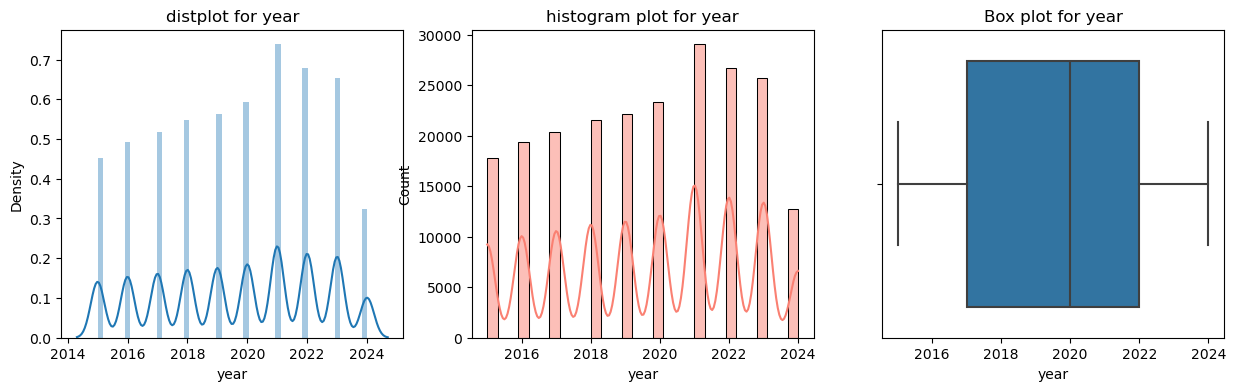

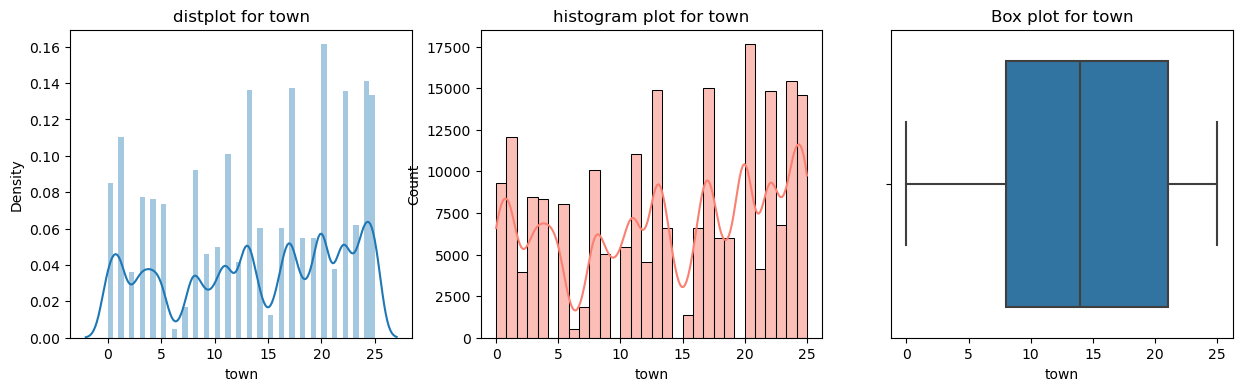

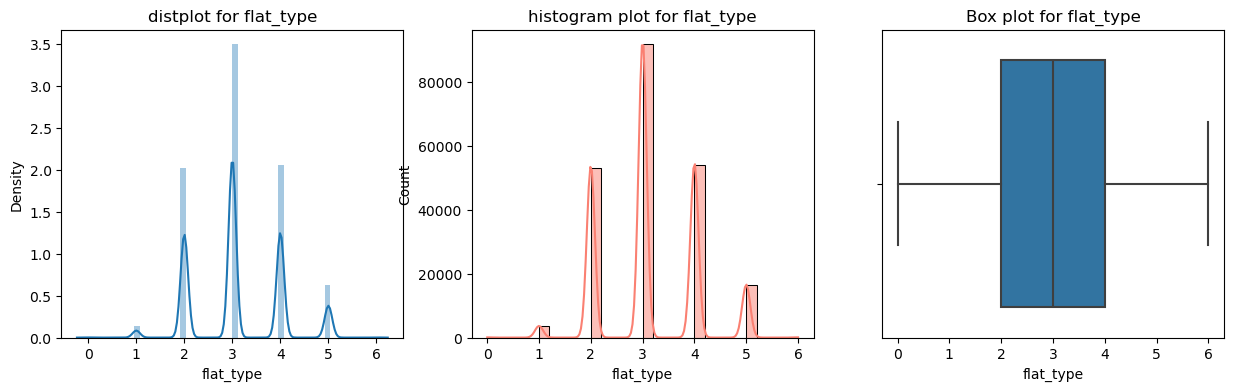

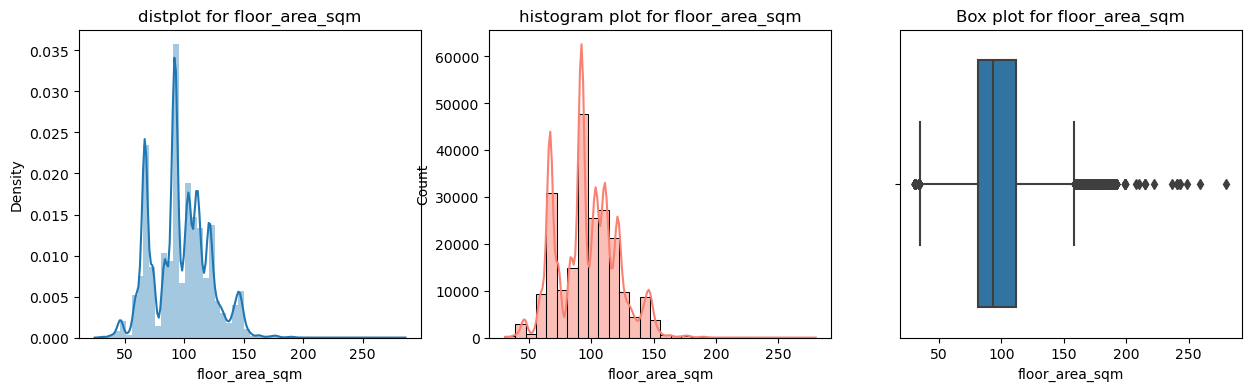

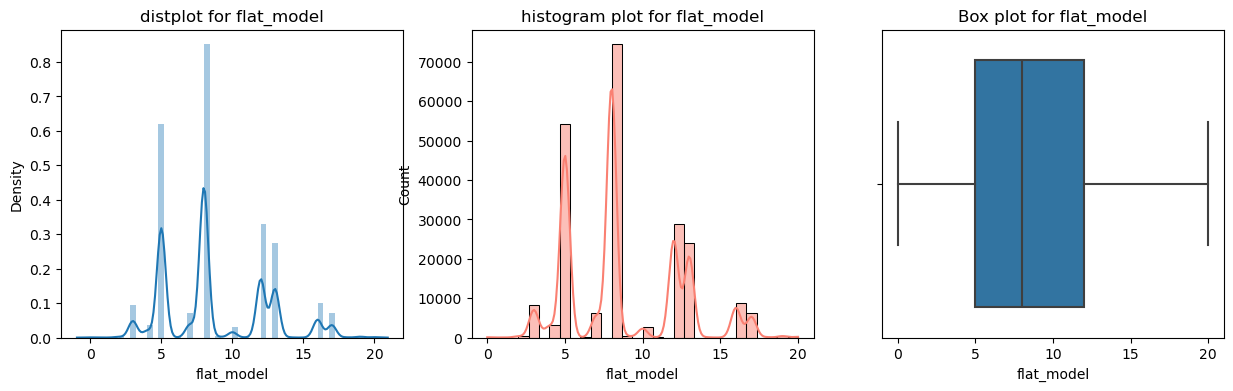

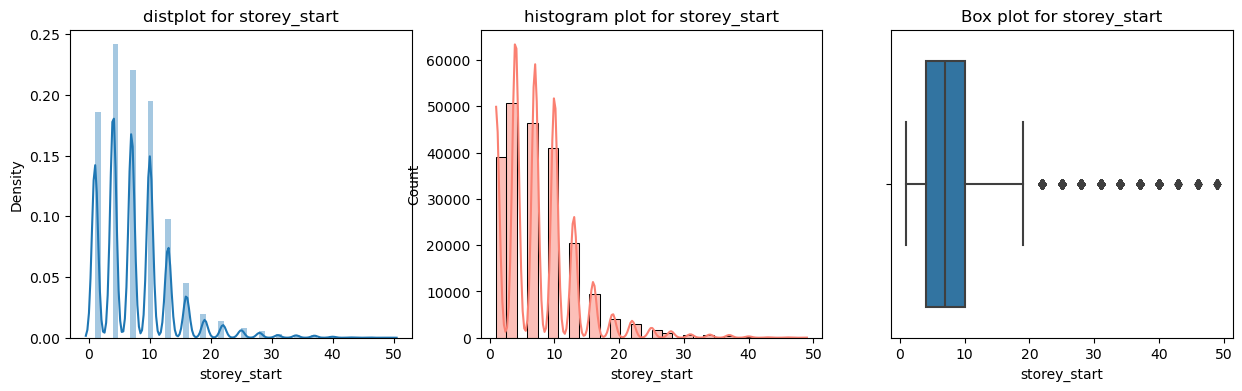

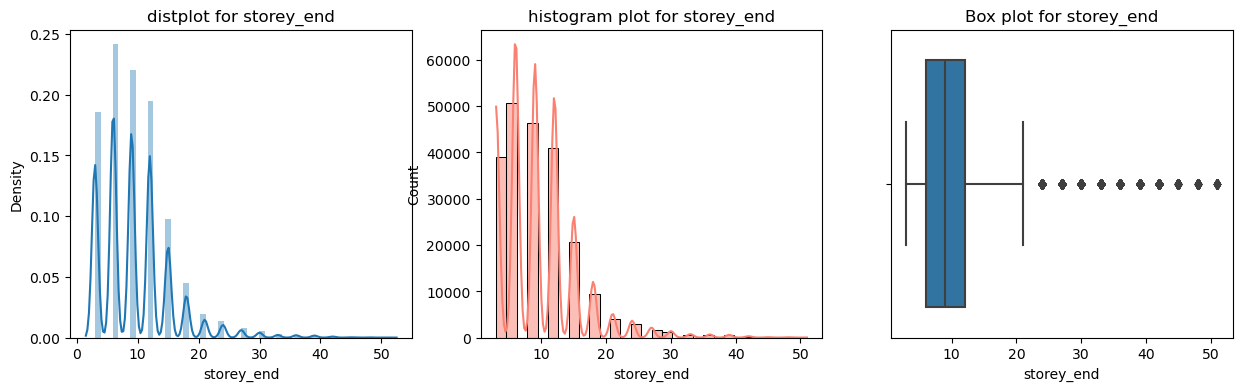

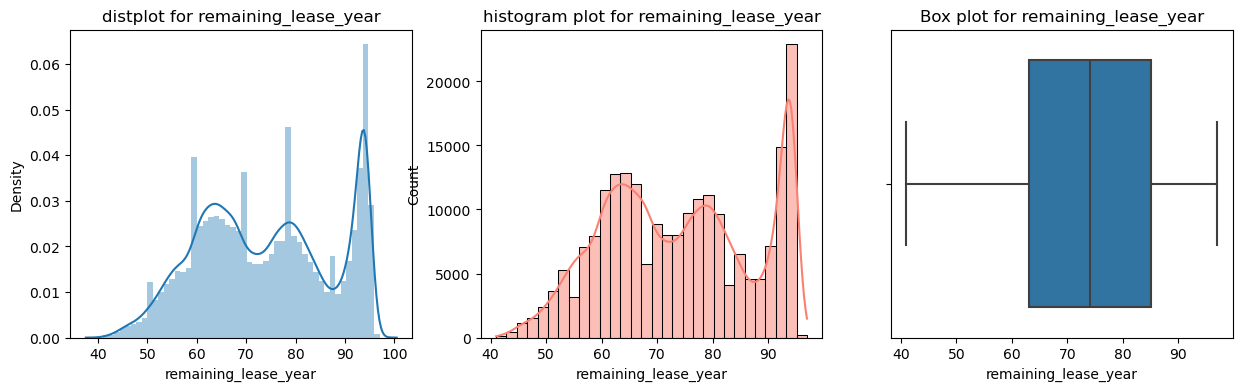

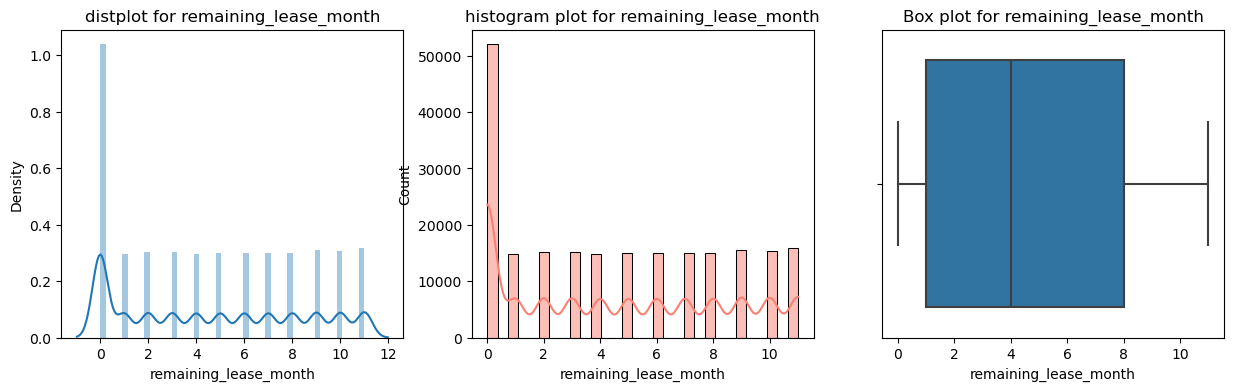

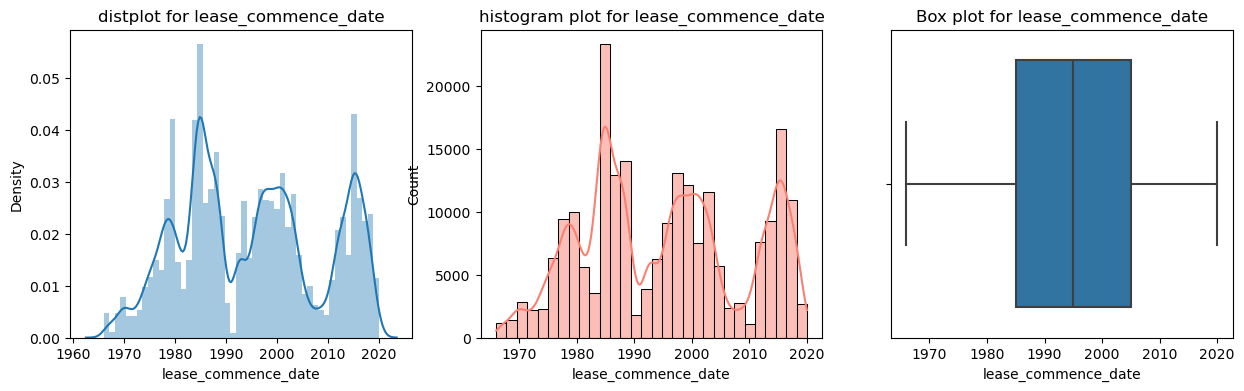

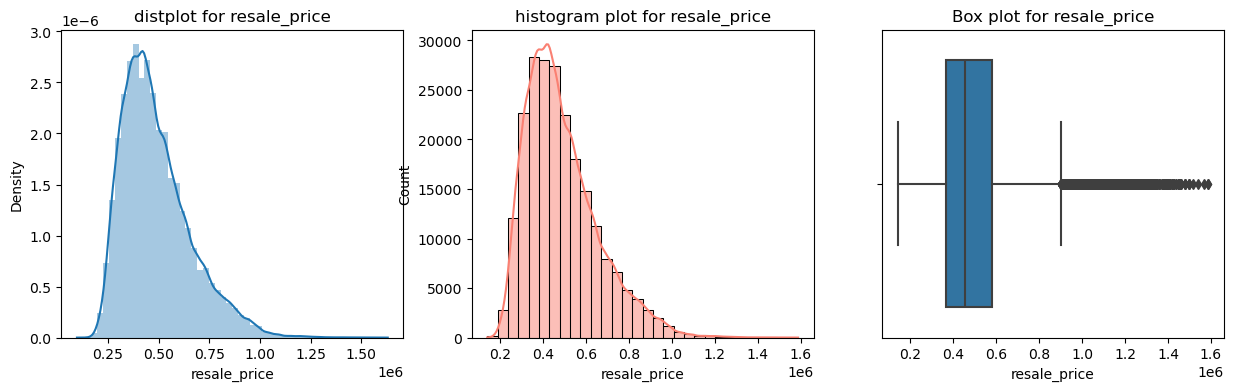

In [50]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [51]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,218715.0,2019.625001,2.692512,2015.0,2017.0,2020.0,2022.0,2024.0
town,218715.0,13.892266,7.956154,0.0,8.0,14.0,21.0,25.0
flat_type,218715.0,3.120559,0.919452,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,218715.0,97.127522,24.061684,31.0,81.0,93.0,112.0,280.0
flat_model,218715.0,8.689889,3.645529,0.0,5.0,8.0,12.0,20.0
storey_start,218715.0,7.658515,5.844366,1.0,4.0,7.0,10.0,49.0
storey_end,218715.0,9.658515,5.844366,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,218715.0,74.093327,13.486653,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,218715.0,4.604385,3.781364,0.0,1.0,4.0,8.0,11.0
lease_commence_date,218715.0,1995.152239,13.691805,1966.0,1985.0,1995.0,2005.0,2020.0


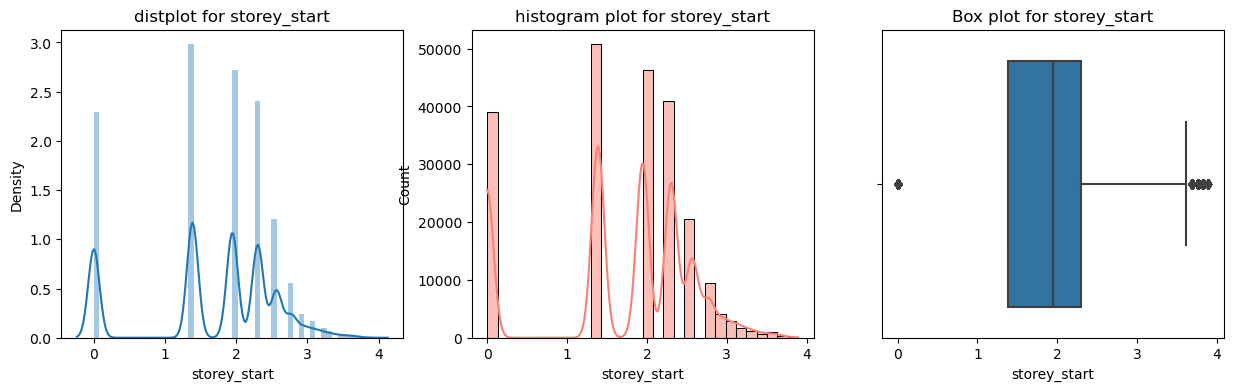

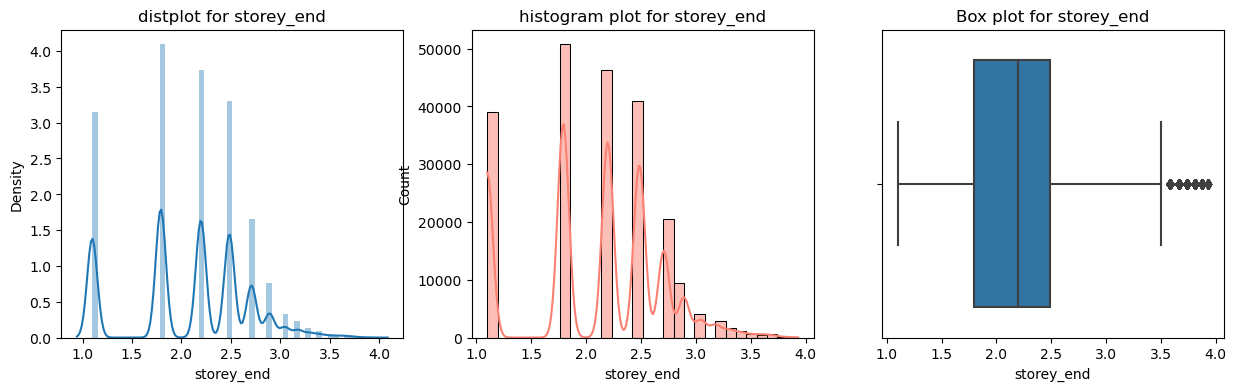

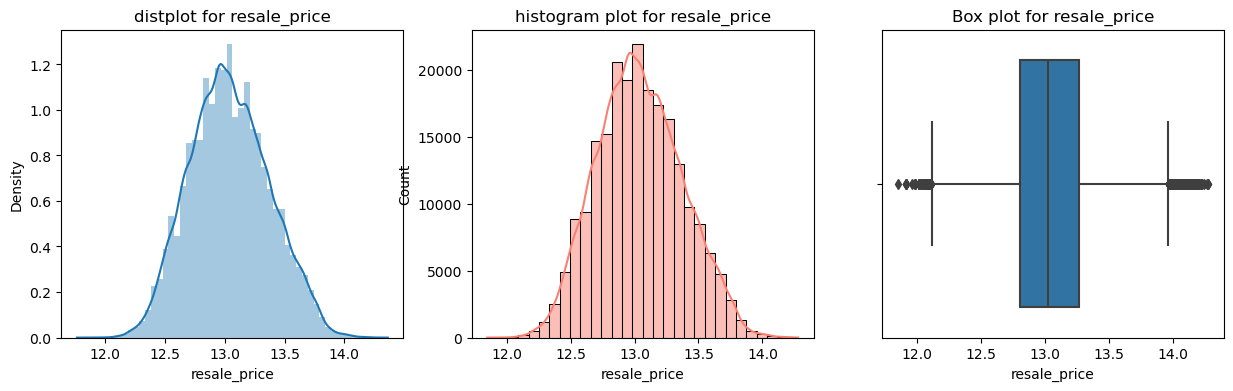

In [52]:
df_final_3= df_final_2.copy()
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

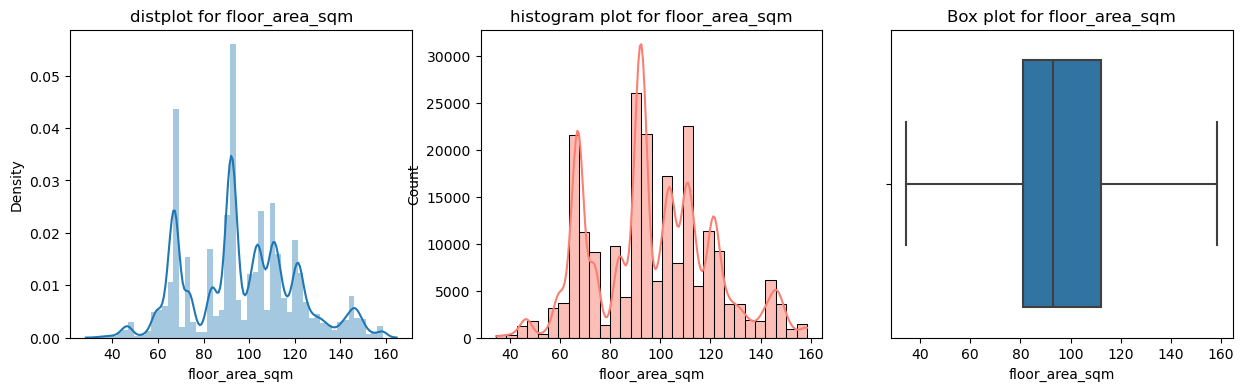

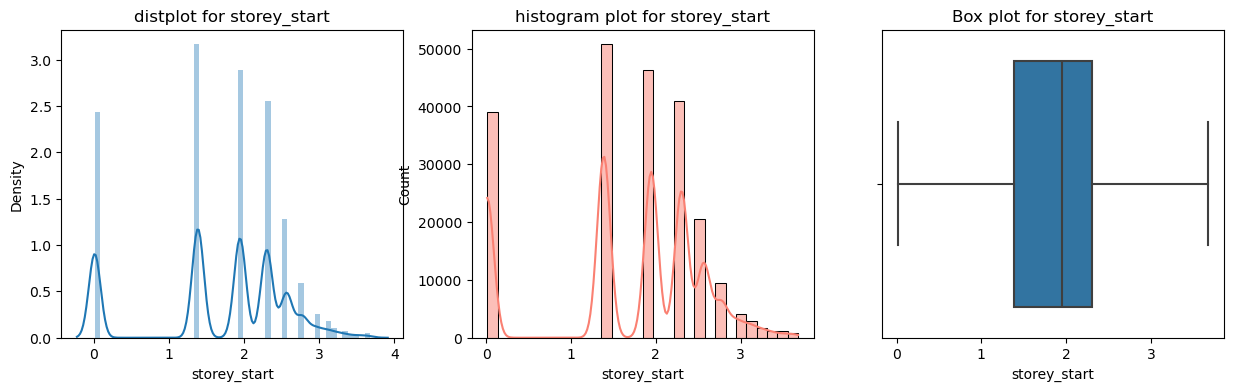

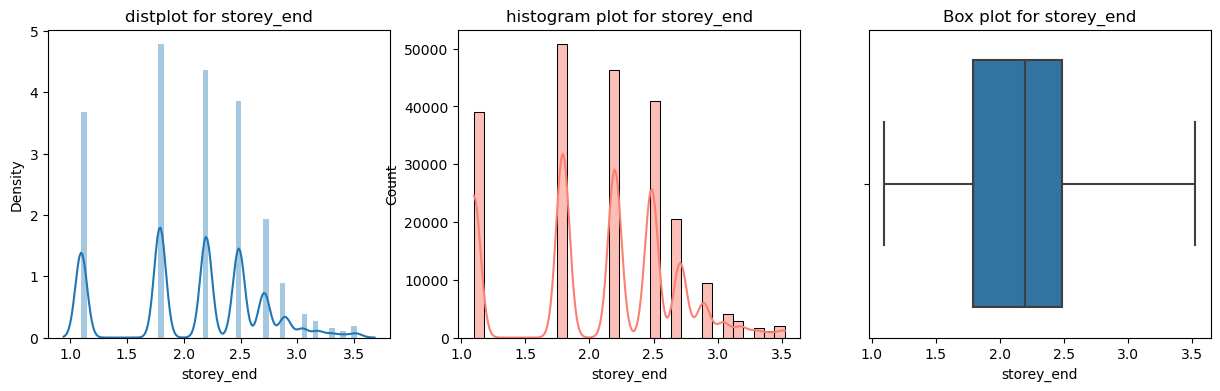

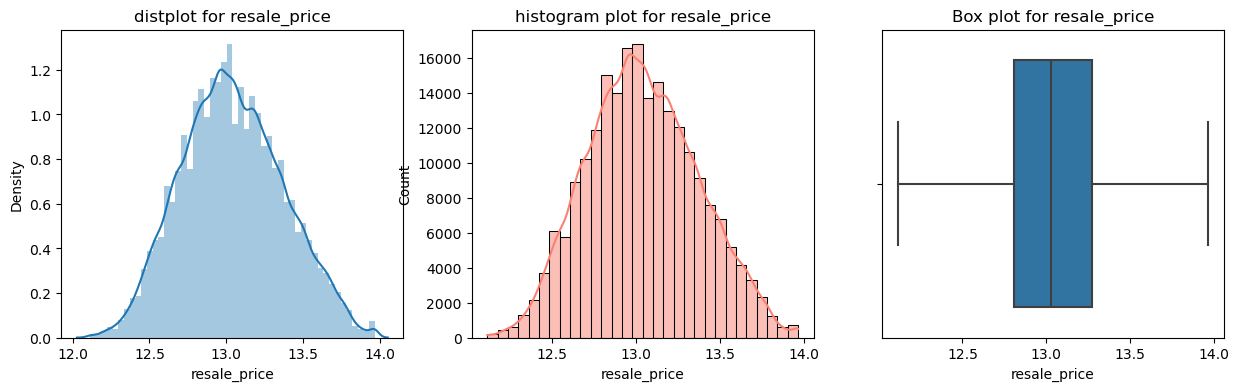

In [53]:
#Outliers Handling - Interquartile Range(IQR) Method
df_final_4= df_final_3.copy()
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)
for k in outlier_columns:
    plot(df_final_4,k)

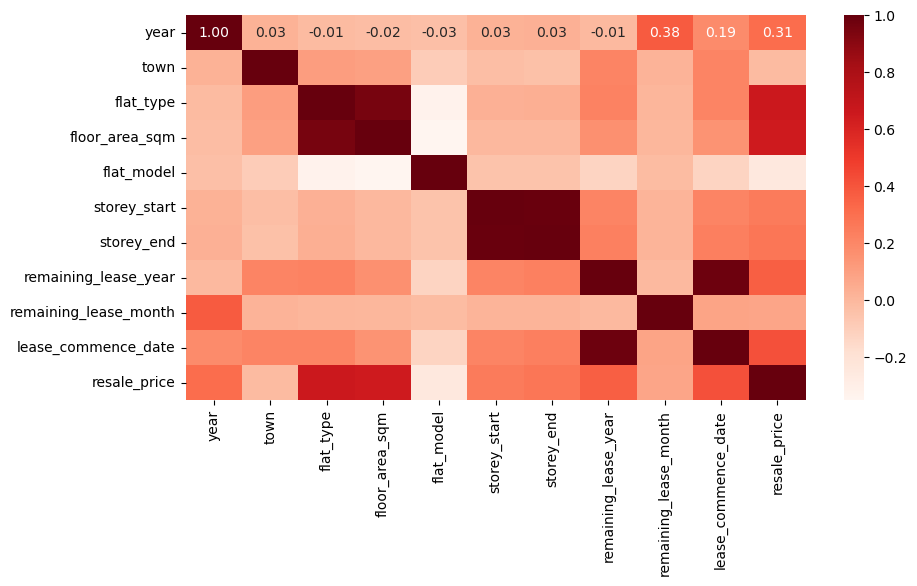

In [55]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Reds", fmt="0.2f")
plt.show()

In [56]:
#Model Selection (Regression)
df_final_5= df_final_4.copy()
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,218715.0,2019.625001,2.692512,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,218715.0,13.892266,7.956154,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,218715.0,3.120559,0.919452,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,218715.0,97.054448,23.828543,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,218715.0,8.689889,3.645529,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,218715.0,1.695693,0.920781,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,218715.0,2.093423,0.601228,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,218715.0,74.093327,13.486653,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,218715.0,4.604385,3.781364,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,218715.0,1995.152239,13.691805,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [57]:
np.exp(13.942690)

1135620.7776035476

In [58]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36467,2016,12,14,2.0,259.0,18.0,6819,1,3,54,0,1972,1150000.0
38448,2017,2,2,4.0,120.0,4.0,3225,40,42,93,7,2011,1180000.0
47892,2017,7,18,5.0,156.0,3.0,1227,19,21,77,3,1995,1160000.0
54395,2017,11,7,4.0,107.0,20.0,1942,43,45,92,2,2011,1138000.0
60199,2018,3,7,4.0,107.0,20.0,1939,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218216,2024,6,14,4.0,117.0,13.0,9263,1,3,92,2,2017,1200000.0
218220,2024,6,15,4.0,157.0,2.0,7460,10,12,50,10,1976,1380000.0
218327,2024,6,18,4.0,124.0,5.0,8854,19,21,72,5,1997,1260000.0
218562,2024,6,23,3.0,93.0,8.0,942,31,33,93,3,2018,1200000.0


In [59]:
np.exp(12.104561)

180694.13157722994

In [60]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8083,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6204,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3556,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1414,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8083,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5844,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2343,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8083,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6376,7,9,91,3,2015,150000.0


In [61]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [62]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [63]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6760356316669265, 'Mean_squared_error': 0.03558670906303692, 'Root_mean_squared_error': 0.18864439844065584, 'Mean_absolute_error': 0.14763048109720658}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6744469820777231, 'Mean_squared_error': 0.03592342231248109, 'Root_mean_squared_error': 0.1895347522553083, 'Mean_absolute_error': 0.14837683315169628}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962300846658051, 'Mean_squared_error': 0.000414116159998018, 'Root_mean_squared_error': 0.02034984422539932, 'Mean_absolute_error': 0.0072431572831946345}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9251521027935814, 'Mean_squared_error': 0.008259154339000102, 'Root_mean_squared_error': 0.09087988962911488, 'Mean_absolute_error': 0.06445725238942673}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.991166739637633, 'Mean_squared_error': 0.0009

In [64]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9551585532452914, 'Mean_squared_error': 0.004948067258453772, 'Root_mean_squared_error': 0.07034249966026067, 'Mean_absolute_error': 0.051524292724641776}


In [65]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [66]:
np.exp(12.815838)

367999.92008841544

In [67]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.805111041421648

In [71]:
np.exp(12.805111041421648)

364073.4971273029

In [69]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [70]:
import pickle
import numpy as np
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.302190931787571

In [72]:
np.exp(12.302190931787571)

220177.85527299403